# Персептрон (Perceptron)

Персептрон — математическая или компьютерная модель восприятия информации мозгом (кибернетическая модель мозга), предложенная Фрэнком Розенблаттом в **1958** году и впервые реализованная в виде электронной машины "Марк-1" в 1960 году. Перцептрон стал одной из первых моделей нейросетей, а "Марк-1" — первым в мире нейрокомпьютером.

# Rosenblatt’s single-layer perceptron

**Персептрон состоит из одного слоя пороговой логической единицы (Threshold Logic Unit = TLU)**. 

Сам персептрон обычно **используется для простой линейной двоичной классификации**.

Перцептрон **состоит из** трёх типов элементов, а именно: 
- поступающие от датчиков сигналы передаются 
- ассоциативным элементам, 
- затем - реагирующим элементам.

<img src='https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/diagrams/perceptron.drawio.svg' />

Таким образом, перцептроны позволяют создать набор "ассоциаций" между входными стимулами и необходимой реакцией на выходе. 
**В биологическом плане это соответствует преобразованию**, например, зрительной информации в физиологический ответ от двигательных нейронов. 

Согласно современной терминологии, перцептроны **могут быть классифицированы как** искусственные нейронные сети:
- с одним скрытым слоем
- с пороговой передаточной функцией
- с прямым распространением сигнала

## Описание на основе сигналов

Cоставные элементы перцептрона являются частными случаями искусственного **нейрона с пороговой передаточной функцией**.

- Простым S-элементом (сенсорным) является чувствительный элемент, который от воздействия какого-либо из видов энергии (например, света, звука, давления, тепла и т. п.) вырабатывает сигнал. Если входной сигнал превышает некоторый порог $\Theta$ (threshold), на выходе элемента получаем +1, в противном случае — 0.
- Простым A-элементом (ассоциативным) называется логический решающий элемент, который даёт выходной сигнал +1, когда алгебраическая сумма его входных сигналов превышает некоторую пороговую величину $\Theta$ (говорят, что элемент активный), в противном случае выход равен 0.
- Простым R-элементом (реагирующим, то есть действующим) называется элемент, который выдаёт сигнал +1, если сумма его входных сигналов является строго положительной, и сигнал −1, если сумма его входных сигналов является строго отрицательной. Если сумма входных сигналов равна нулю, выход считается либо равным нулю, либо неопределённым.

*Если на выходе любого элемента получаем 1, то говорят, что элемент активен или возбуждён.*

Все рассмотренные элементы **называются простыми, так как они реализуют скачкообразные функции**. Розенблатт утверждал также, что для решения более сложных задач могут потребоваться другие виды функций, например, линейная.


<img src='https://raw.githubusercontent.com/ryndovaira-org/data_science_notes/main/diagrams/perceptron_threshold_functions.png' width=500/>

В результате Розенблатт ввёл следующие определения:

- **Перцептрон** представляет собой сеть, состоящую из S-, A-, R-элементов, с переменной матрицей взаимодействия $W$ (элементы которой $w_{ij}$ — весовые коэффициенты), определяемой последовательностью прошлых состояний активности сети.
- **Перцептроном с последовательными связями** называется система, в которой все связи, начинающиеся от элементов с логическим расстоянием d от ближайшего S-элемента, оканчиваются на элементах с логическим расстоянием d+1 от ближайшего S-элемента.
- **Простым перцептроном** называется любая система, удовлетворяющая следующим условиям:
    - в системе имеется только один R-элемент (естественно, он связан со всеми A-элементами);
    - система представляет собой перцептрон с последовательными связями, идущими только от S-элементов к A-элементам и от A-элементов к R-элементам;
    - веса всех связей от S-элементов к A-элементам (S—A связей) неизменны;
    - время передачи каждой связи равно либо нулю, либо фиксированной постоянной $\tau$;
    - все активирующие функции S-, A-, R-элементов имеют вид $U_{i}(t)=f(a_{i}(t))$, где $a_{{i}}(t)$ — алгебраическая сумма всех сигналов, поступающих одновременно на вход элемента $u_{{i}}$
- **Элементарным перцептроном** называется простой перцептрон, у которого все элементы — простые. В этом случае его активизирующая функция имеет вид $c_{ij}(t)=U_{i}(t-\tau )w_{ij}(t)$.
- **Многослойный перцептрон** (по Розенблатту) — это перцептрон, в котором присутствуют дополнительные слои A-элементов. Его анализ провёл Розенблатт в третьей части своей книги.


# sklearn

[sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [1]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

X, y = load_digits(return_X_y=True)
clf = Perceptron(random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.9393433500278241

# From scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [
            W + X * self.learningRate * (output - output_prev)
            for (W, X) in zip(self.weights, inputs)
        ]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation


InitialWeights = [0.1, 0.1]
InitialBias = 0.01
LearningRate = 0.1
SLperceptron = SingleLayerPerceptron(InitialWeights, InitialBias, LearningRate)

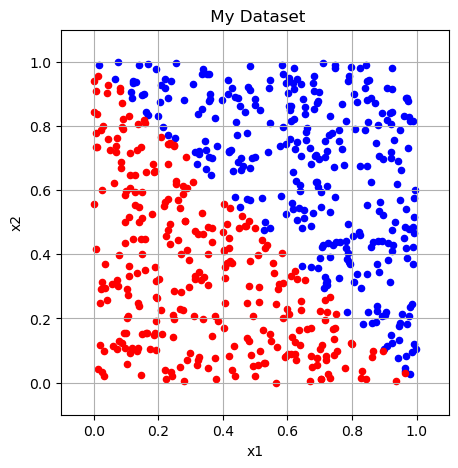

In [3]:
def show_dataset(data, ax):
    data[data.y == 1].plot(kind="scatter", ax=ax, x="x1", y="x2", color="blue")
    data[data.y == 0].plot(kind="scatter", ax=ax, x="x1", y="x2", color="red")
    plt.grid()
    plt.title(" My Dataset")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)


def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer


data = pd.DataFrame(columns=("x1", "x2"), data=np.random.uniform(size=(600, 2)))
data["y"] = data.apply(testing, axis=1)

fig = plt.figure(figsize=(5, 5))
show_dataset(data, fig.gca())

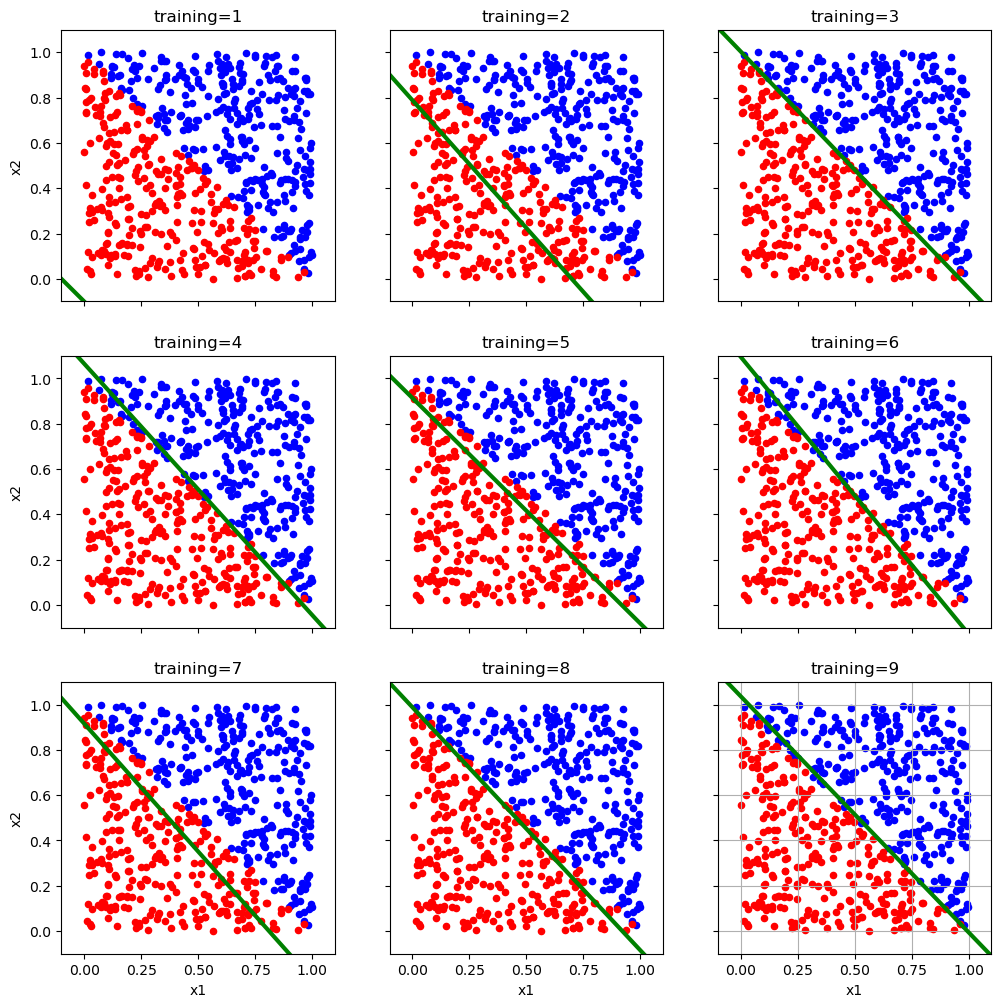

In [4]:
import random, itertools


def showAll(perceptron, data, threshold, ax=None):
    if ax == None:
        fig = plt.figure(figsize=(5, 4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = "training={}".format(threshold + 1)
    ax.set_title(title)


def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2], line[2])

    return count


def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold


def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="green", linewidth=3)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)


f, axarr = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 12))
axs = list(itertools.chain.from_iterable(axarr))
until = 9
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

# References

[Перцептрон](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD)

[Perceptron](https://en.wikipedia.org/wiki/Perceptron)

[Perceptron Neural Network](https://www.kaggle.com/code/vitorgamalemos/perceptron-neural-network)

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()
